## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1bkcr55sW6BrcgKVPEGTb3vvhpnrklKKq?usp=sharing

Fill in cells below and fit neural networks for solving the binary classification task.

**Requirement**
- Python, Pytorch (Must), and all other necessary libraries
- **Just don't cheat, Thanks!**
- Sample output is to help you understand the task, and get an idea of what you have to do

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchsummary import summary
from torchvision.models import vgg16
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.applications import VGG16

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# Research on how to load google drive files into colab if you are using colab

In [29]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'train'
val = 'val'
test = 'test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 5000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. flatten, which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use Dropout (0.5) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.


In [31]:
model_1 = Sequential()
model_1.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_10 = model_1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/10
78/78 [==============================] - 106s 1s/step - loss: 0.6885 - accuracy: 0.5363 - val_loss: 0.6567 - val_accuracy: 0.5905
Epoch 2/10
78/78 [==============================] - 91s 1s/step - loss: 0.6428 - accuracy: 0.6312 - val_loss: 0.5954 - val_accuracy: 0.6826
Epoch 3/10
78/78 [==============================] - 87s 1s/step - loss: 0.5811 - accuracy: 0.6942 - val_loss: 0.5476 - val_accuracy: 0.7208
Epoch 4/10
78/78 [==============================] - 92s 1s/step - loss: 0.5692 - accuracy: 0.7085 - val_loss: 0.5696 - val_accuracy: 0.6982
Epoch 5/10
78/78 [==============================] - 106s 1s/step - loss: 0.5350 - accuracy: 0.7334 - val_loss: 0.4933 - val_accuracy: 0.7599
Epoch 6/10
78/78 [==============================] - 89s 1s/step - loss: 0.4891 - accuracy: 0.7680 - val_loss: 0.5633 - val_accuracy: 0.7039
Epoch 7/10
78/78 [==============================] - 89s 1s/step - loss: 0.5002 - accuracy: 0.7580 - val_loss: 0.4828 - val_accuracy: 0.7706
Epoch 8/10
78/78 [

In [32]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
scores = model_1.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1] * 100))

Accuracy on test data: 78.77%


In [33]:
model_1 = Sequential()
model_1.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_10 = model_1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/15
78/78 [==============================] - 88s 1s/step - loss: 0.6883 - accuracy: 0.5530 - val_loss: 0.6550 - val_accuracy: 0.6225
Epoch 2/15
78/78 [==============================] - 92s 1s/step - loss: 0.6414 - accuracy: 0.6214 - val_loss: 0.6053 - val_accuracy: 0.6797
Epoch 3/15
78/78 [==============================] - 105s 1s/step - loss: 0.5982 - accuracy: 0.6785 - val_loss: 0.5736 - val_accuracy: 0.6916
Epoch 4/15
78/78 [==============================] - 92s 1s/step - loss: 0.5742 - accuracy: 0.6996 - val_loss: 0.5445 - val_accuracy: 0.7274
Epoch 5/15
78/78 [==============================] - 86s 1s/step - loss: 0.5486 - accuracy: 0.7296 - val_loss: 0.5348 - val_accuracy: 0.7315
Epoch 6/15
78/78 [==============================] - 92s 1s/step - loss: 0.5408 - accuracy: 0.7350 - val_loss: 0.4972 - val_accuracy: 0.7660
Epoch 7/15
78/78 [==============================] - 94s 1s/step - loss: 0.5135 - accuracy: 0.7562 - val_loss: 0.4915 - val_accuracy: 0.7545
Epoch 8/15
78/78 [=

In [34]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
scores = model_1.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1] * 100))

Accuracy on test data: 80.21%


In [35]:
model_1 = Sequential()
model_1.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_10 = model_1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/20
78/78 [==============================] - 89s 1s/step - loss: 0.6822 - accuracy: 0.5703 - val_loss: 0.6458 - val_accuracy: 0.6246
Epoch 2/20
78/78 [==============================] - 88s 1s/step - loss: 0.6185 - accuracy: 0.6508 - val_loss: 0.6568 - val_accuracy: 0.5995
Epoch 3/20
78/78 [==============================] - 87s 1s/step - loss: 0.6035 - accuracy: 0.6801 - val_loss: 0.5619 - val_accuracy: 0.7253
Epoch 4/20
78/78 [==============================] - 89s 1s/step - loss: 0.5557 - accuracy: 0.7161 - val_loss: 0.5191 - val_accuracy: 0.7471
Epoch 5/20
78/78 [==============================] - 92s 1s/step - loss: 0.5302 - accuracy: 0.7363 - val_loss: 0.4994 - val_accuracy: 0.7677
Epoch 6/20
78/78 [==============================] - 88s 1s/step - loss: 0.5020 - accuracy: 0.7581 - val_loss: 0.5117 - val_accuracy: 0.7385
Epoch 7/20
78/78 [==============================] - 100s 1s/step - loss: 0.4847 - accuracy: 0.7668 - val_loss: 0.4941 - val_accuracy: 0.7632
Epoch 8/20
78/78 [=

In [36]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
scores = model_1.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1] * 100))

Accuracy on test data: 83.73%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

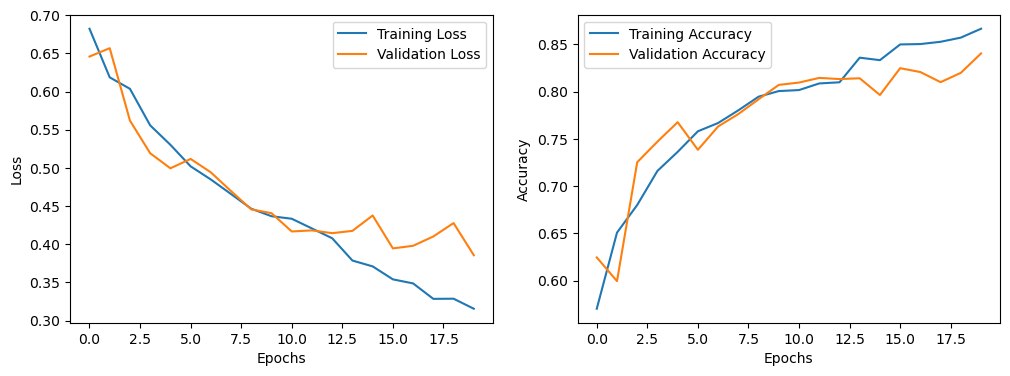

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_10.history['loss'], label='Training Loss')
plt.plot(history_10.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_10.history['accuracy'], label='Training Accuracy')
plt.plot(history_10.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [41]:
# Transfer Learning using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [42]:
# add layers to VGG16:
model_2 = Sequential()
model_2.add(base_model)
model_2.add(Flatten())
model_2.add(Dense(256))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1))
model_2.add(Activation('sigmoid'))

model_2.layers[0].trainable = False

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [43]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.
history_vgg = model_2.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5
78/78 [==============================] - 1208s 16s/step - loss: 0.5360 - accuracy: 0.7883 - val_loss: 0.2960 - val_accuracy: 0.8655
Epoch 2/5
78/78 [==============================] - 1255s 16s/step - loss: 0.3096 - accuracy: 0.8680 - val_loss: 0.2432 - val_accuracy: 0.9071
Epoch 3/5
78/78 [==============================] - 1528s 20s/step - loss: 0.2564 - accuracy: 0.8894 - val_loss: 0.2610 - val_accuracy: 0.8857
Epoch 4/5
78/78 [==============================] - 1305s 17s/step - loss: 0.2439 - accuracy: 0.8984 - val_loss: 0.2442 - val_accuracy: 0.8951
Epoch 5/5
78/78 [==============================] - 1484s 19s/step - loss: 0.2191 - accuracy: 0.9125 - val_loss: 0.2224 - val_accuracy: 0.9087


In [46]:
scores = model_2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1] * 100))

Accuracy on test data: 89.94%


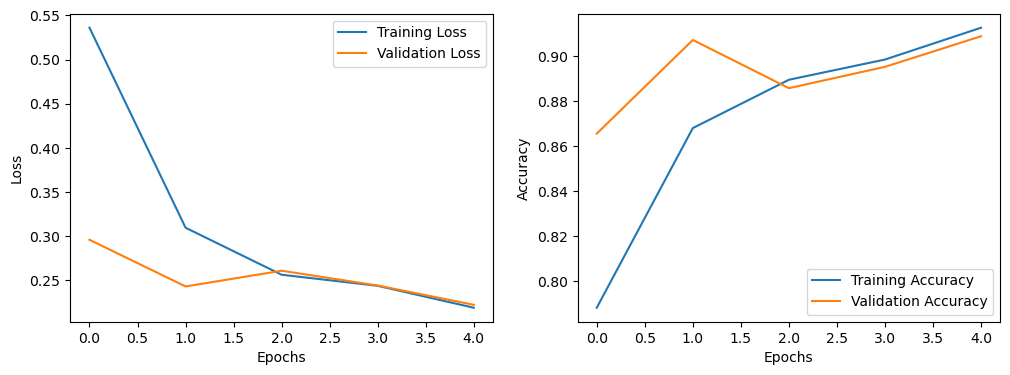

In [47]:
# Plot the loss and accuracy graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save and Showcase how good is your model

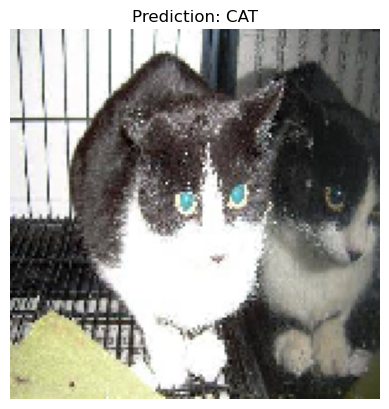

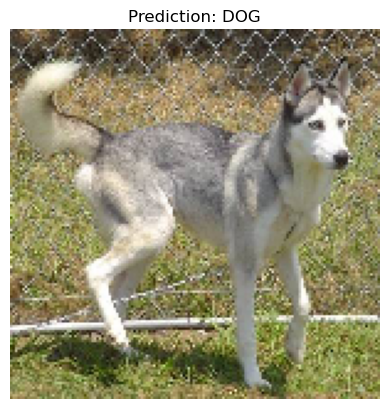

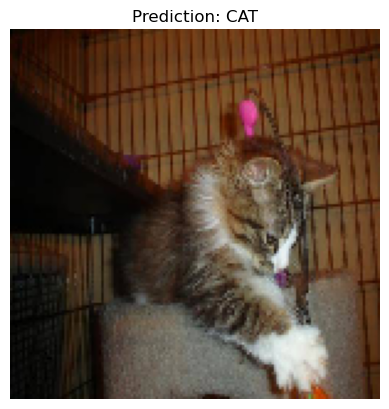

In [57]:
def show_image_prediction(image_path, model, target_size):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img) / 255.0
    img = tf.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_label = 'dog' if prediction[0][0] > 0.5 else 'cat'

    plt.imshow(img[0])
    plt.title(f"Prediction: {class_label.upper()}")
    plt.axis('off')
    plt.show()

# Usage example
image_path = 'val/cats/cat.11251.jpg'
show_image_prediction(image_path, model_1, (img_width, img_height))

# Usage example
image_path = 'val/dogs/dog.11250.jpg'
show_image_prediction(image_path, model_1, (img_width, img_height))

# Usage example
image_path = 'val/cats/cat.11253.jpg'
show_image_prediction(image_path, model_1, (img_width, img_height))